## Recomender Systems

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#get data
#start with columns
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
#read u_data with pandas, convert to DataFrame
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [9]:
#get movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
#merge u.data(my DataFrame) and movie title, limk to join is item_id in both
df = pd.merge(df, movie_titles, on='item_id')

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


## Exploring Data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#create a ratings DataFrame based on title
#find the average rating for every title
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [20]:
#checking for the best movies, in this case just viewing it in descending order
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [21]:
#checking movies with the most ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [22]:
#turning ratings into a DataFrame
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [32]:
#add column to rating DF to cehck number of people whoi rated it
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: xlabel='num of ratings', ylabel='Count'>

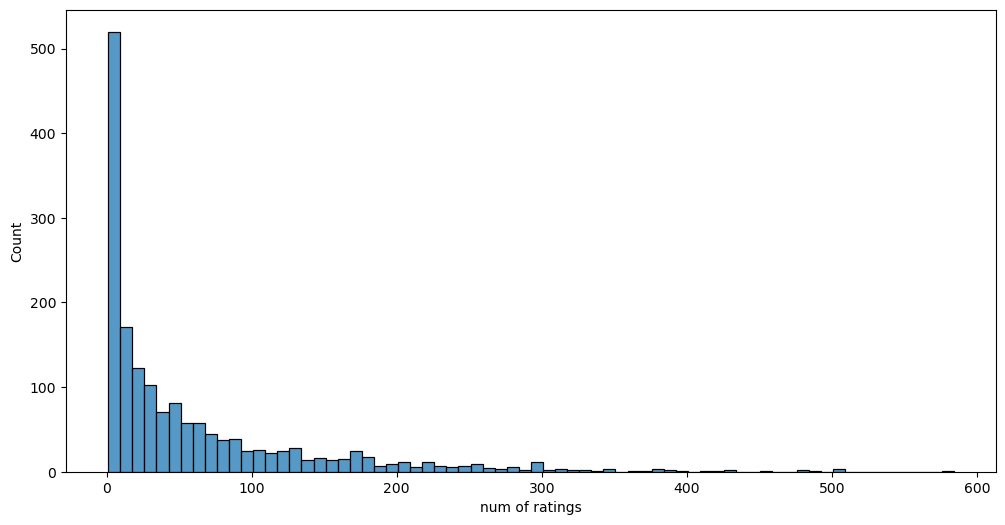

In [36]:
#visualization
#show num of ratings
plt.figure(figsize=(12, 6))
sns.histplot(ratings['num of ratings'], bins=70)

<Axes: xlabel='rating', ylabel='Count'>

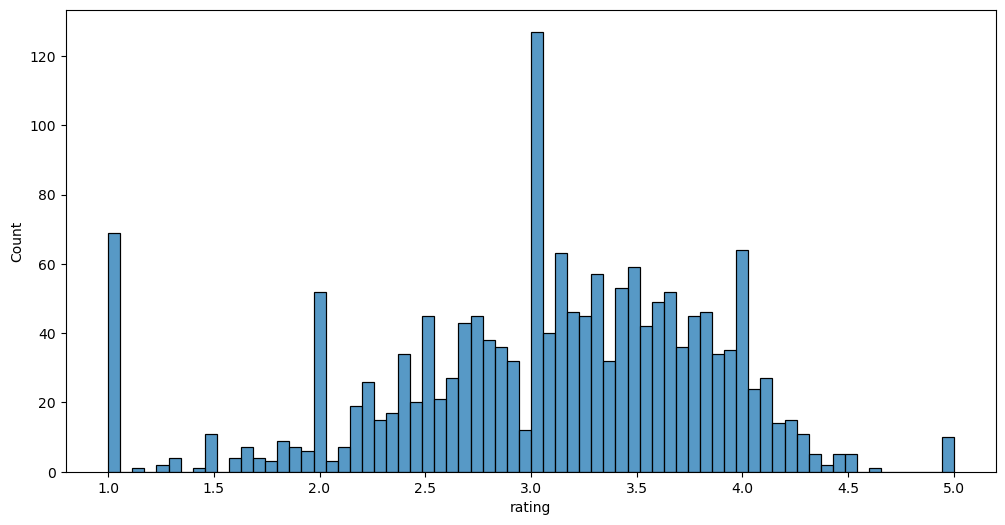

In [38]:
#showing ratings
plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=70)

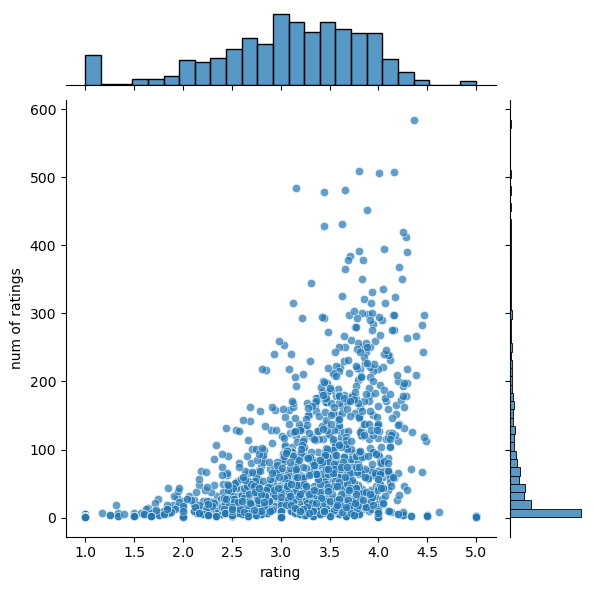

In [40]:
#visualize the relationshipt between number of ratings and average ratings
sns.jointplot(ratings, x='rating',y='num of ratings', alpha=0.7)

In [41]:
#create a user matrix, based on user id, rating and movie title
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [44]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#we are creating the recommender system based on the ratings and number of ratings
ratings.sort_values('num of ratings', ascending=False).head(20)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [48]:
#recommendations based on if the user liked star wars
#so the system show recommend movies similar to star wars 
starwars_user_ratings = moviemat['Star Wars (1977)']

In [50]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [52]:
#use corrwith to check the correlation
#movies that have a high correlation to star wars
#example maybe the same people who reviewed this movie, reviewed star wars 
similar_to_star_wars = moviemat.corrwith(starwars_user_ratings)

C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [54]:
#create a DataFrame for movies with a high correlation to star wars
corr_starwars = pd.DataFrame(similar_to_star_wars, columns=['Correlation'])

#Drop NaN Values
corr_starwars.dropna(inplace=True)

In [56]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [58]:
#make the data make sense
#filtering out movies with less than 100 reviews to make the recomendations better
#lets check the number of reviews and join them to the data frame
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [60]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [62]:
#check for movies with more than 50 or 100 ratings
#because we want movies with high number of reviews on this list
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [70]:
independence_day_user_ratings = moviemat['Independence Day (ID4) (1996)']

In [72]:
independence_day_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Independence Day (ID4) (1996), dtype: float64

In [90]:
#use corrwith to check the correlation
similar_to_independence_day = moviemat.corrwith(independence_day_user_ratings)

C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\aduko\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [92]:
corr_independence_day = pd.DataFrame(similar_to_independence_day, columns=['Correlation'])

#Drop NaN Values
corr_independence_day.dropna(inplace=True)

In [94]:
corr_independence_day.head()

,Correlation
title,
'Til There Was You (1997),0.867528
1-900 (1994),-1.000000
101 Dalmatians (1996),0.311182
12 Angry Men (1957),0.134572
187 (1997),0.118750


In [96]:
corr_independence_day = corr_independence_day.join(ratings['num of ratings'])

In [98]:
corr_independence_day.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.867528,9
1-900 (1994),-1.000000,5
101 Dalmatians (1996),0.311182,109
12 Angry Men (1957),0.134572,125
187 (1997),0.118750,41


In [100]:
#check for movies with more than 50 ratings
corr_independence_day[corr_independence_day['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Independence Day (ID4) (1996),1.000000,429
"Craft, The (1996)",0.578351,104
Twister (1996),0.560029,293
Down Periscope (1996),0.531194,101
"Ghost and the Darkness, The (1996)",0.516122,128
